# import modules

pandas가 엑셀을 불러오는 가장 좋은 module. 그런용도로 여기에 있는거고 
이 module들은 다 python, machine learning에 있어 매우 중요

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ImportError: cannot import name 'Assert' from 'tensorflow.python' (unknown location)

# data preparation and visualization

data라는 variable속에 x,y 값이 들어가게 하는것. 


In [12]:
data = pd.read_csv('regression.csv')

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


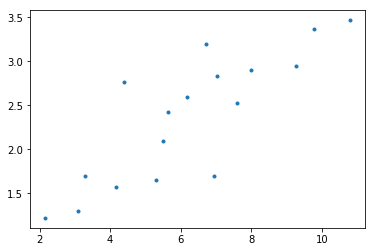

In [15]:
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']
plt.plot(X,Y,'.')

data라는 variable에 csv file이 들어감. panda를 통해
근데 그 안에는 또 x,y라는 variable이 있으니까 그걸 분리하는게 그 밑
근데 그 아래는 그걸 그래서 PLOT하면 우리가 몰랐던 패턴이 visualize됨. 
(그렇기에 visualization이 중요. 그래야만 패턴이 보이니까 ) 

그래서 x,y column의 애들을 X, Y으로 받는것. 

# create model

In [17]:
model =Sequential()
model.add(Dense(1, input_shape=[1]))
model.complile(optimizer ="sgd", loss='mse')

NameError: name 'Sequential' is not defined

먼저 모델 껍데기를 만듬. 입력에서 출력 vector로 가는게 하나의 sequential이라는 생각하에 이렇게 시작. 이건 사실 아무것도 없는 상태(모델을 불러온게아니라 그냥시작을 하는것)
그렇게 만든 껍데기에 어떤 모델읠 정의내리고, 그 모델이 Dense. 
Dense부분이 그 y=ax+b의 그림. 입출력에 의해 그림이 결정되니까. 그이야기를 여기서 입력 1개, 출력이 1개(이게 앞의 1) 라는 걸 알려줌. 만약 x가 두개다라고 하면 input_shape=[2] 라고 하면 됨. 
Dense라는 말이 갖는 의미는 어떤 모델의 그림을 보면 좌 우의 column들은 서로 full connection이 되어있는데, 모델을 만들때 그냥 full connection이 아닌 몇개 빠진것도 가능하겠지. 그래서 dense는 fully connected된 모델. 

(그러고는 뭘 추가하는데, 뭘 추가하냐면 아까 화살표같은걸 만드는것. 
1은 y의 계수=출력부, input shape 1은 x의 개수. = 입력부
여긴 x,y가 하나씩밖에없는것. 이렇게하면 y=ax+b를 만든것. )

optimizer은 output과 실제 정답값사이의 차이를 보고 계속해서 행렬을 바꿔줘야하는데 , 그  방법 중 하나가 sgd. 
loss 부분은 출력부(target)와 정답값(output)의 차이를 어떻게 계산할지. 단순 빼기? 어떻게 할까 그런걸 결정하는 부분. 그 차이를 단순히 반영하는게 아님. 
그 방식 중 하나가 mse (mean square error) 

이렇게 x,y에 대한 model을 만들었으니 이제 데이터를 여기에 넣어줘야함. 
그래야 a,b 즉 함수행렬부분을 찾을 수 있음. 


# train model

In [16]:
model.fit(X,Y, epochs = 1000)

NameError: name 'model' is not defined

train은 data를 가지고 그걸 넣으면서 좋은 a,b값을 estimate하는 과정.
이걸 play하면 17개 돈다는걸 알려줌. sample data17개로 훈련을 시켰다는 말. 이렇게 하면 ab값이 받아졌다고 예쌍해볼 수 있음
epoch의 횟수도 정할 수 있음
이렇게 여러번 돌리면 처음의 loss에 비해 나중의 loss 가 작아짐 (그게 훈련의 목적이니까) - 이건 수렴을 해 가는것. 점점좋아지는 방식으로 . 
loss값을 통해 learning, training이 잘 되었다는걸 확인할 수 있지만, 실질적으로 확인하는 방법은 아래 cell

# model prediction

실제로 model이 잘 만들어졌는지.
predict는 출력을 모르는 상태에서 입력을 그냥 넣어보는것. 그럼 어떤 값이 나올텐데, 그걸 보면 인식시스템이 잘 만들어 졌다는 걸 알 수 있음
(a,b가 정해졌다는 생각 하에 x에 뭔갈 넣는게 predict. 근데 어떤 x값을 줄지는 그냥 마음대로 하면 되는데, 더 잘 확인하기 위해선 plot의 범위안에서 하는게 합리적이겟지..굳이 막 동떨어진 100같은 숫자를 줘버리는것보다는)

In [18]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = model.predict(x)
print(y)
plt.plot(X, Y, '.')
plt.plot(x,y,'rx')
plt.show()

NameError: name 'model' is not defined

x를 새로 정해주고 그걸 우리가 만든 model에 넣었을 떄 의 값을 보는것. 그걸 print해보면 계싼된 y가 나오고 , 그걸 확인해보기위해 plot를 해보면 
일단 위에껀 처음 model거, 뒤에껀 우리가 새로 한거.그래서 처음껀 대문자 XY , 아래껀 우리가 새로 만든 소문자 x,y 
그럼 파란 점으로는 원래 데이타가 plot가 되고, 새로 넣은건 빨간 x로 표시가 되는데, 그러면 예측되는 값이 일직선. 이건 왜냐면 우리가 애초에 y=ax+B를 인공적으로 만들엇었던거거고, 우리가 predict한 데이타가 model에 의해 잘 나온다는걸 볼수있으니 이제 데이타가 따로 없어도 언제든지 예측할 수 있는 시스템을 가지고 있는것. 


그렇다면 우리가 y=ax+b를 만들었는데, a는 뭐고 b는 뭐지? (수학적으로)
그걸 구하는게 밑

# what are a and b in y = ax + b?

In [ ]:
weight= model.layers[0].get_weights()
print(weight)

우리는 애초에 layer를 1개만들었으니까 첫번쨰를 확인하기위해 저렇게 쓰면
그 하나의 화살표덩어리인layer를 weight로 가져오라는것. 
그걸 print해보면 값이 두개가 나옴. array두개가 나오는데, 첫번째깨 a 값. 그 다음 array가 b 값. 

그니까 layer는 그냥 단계,,, 그니까 우리는 여기서 하나만 만든거. 화살표값들은 weight 우리는 여기선 a,b로 화살표를 두개밖에 안만들었음 
그니까 run을 하면 결과로 값이 두개가 나옴. 
